## Spotify’s Worldwide Daily Song Ranking

I'll take a look at the variables of "Spotify's Worlwide Daily Song Ranking" dataset and try to highlight significant aspects and deduct information behind these variables. 

In [1]:
library(tidyverse)
library(lubridate)
library(countrycode)
library(ggplot2)
library(gridExtra)
library(grid)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.3          ✔ dplyr   1.0.1     
✔ tidyr   1.1.1          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
daily_spotify <- read_csv('../input/spotifys-worldwide-daily-song-ranking/data.csv')

Parsed with column specification:
cols(
  Position = col_double(),
  `Track Name` = col_character(),
  Artist = col_character(),
  Streams = col_double(),
  URL = col_character(),
  Date = col_date(format = ""),
  Region = col_character()
)



In [3]:
glimpse(daily_spotify)

Rows: 3,441,197
Columns: 7
$ Position     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ `Track Name` <chr> "Reggaetón Lento (Bailemos)", "Chantaje", "Otra Vez (fea…
$ Artist       <chr> "CNCO", "Shakira", "Zion & Lennox", "Ricky Martin", "J B…
$ Streams      <dbl> 19272, 19270, 15761, 14954, 14269, 12843, 10986, 10653, …
$ URL          <chr> "https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTfo",…
$ Date         <date> 2017-01-01, 2017-01-01, 2017-01-01, 2017-01-01, 2017-01…
$ Region       <chr> "ec", "ec", "ec", "ec", "ec", "ec", "ec", "ec", "ec", "e…


In [4]:
summary(daily_spotify)

    Position       Track Name           Artist             Streams        
 Min.   :  1.00   Length:3441197     Length:3441197     Min.   :    1001  
 1st Qu.: 45.00   Class :character   Class :character   1st Qu.:    3322  
 Median : 92.00   Mode  :character   Mode  :character   Median :    9227  
 Mean   : 94.64                                         Mean   :   51892  
 3rd Qu.:143.00                                         3rd Qu.:   29658  
 Max.   :200.00                                         Max.   :11381520  
     URL                 Date               Region         
 Length:3441197     Min.   :2017-01-01   Length:3441197    
 Class :character   1st Qu.:2017-04-05   Class :character  
 Mode  :character   Median :2017-07-10   Mode  :character  
                    Mean   :2017-07-08                     
                    3rd Qu.:2017-10-10                     
                    Max.   :2018-01-09                     

In [5]:
daily_spotify <- daily_spotify %>% 
  mutate(Date <- ymd(Date)) %>% 
  mutate_at(vars(Date), funs(year, month))

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [6]:
daily_spotify$Date <- months(as.Date(daily_spotify$Date))

In [7]:
names(daily_spotify)[names(daily_spotify) == "Date"] <- "month_name"

In [8]:
daily_spotify$month_name <- factor(daily_spotify$month_name, levels=month.name, labels=month.abb)

### Monthly Streaming Trends

#### Here  it seems that either Spotify's users are increasing or that the users are streaming more songs. More songs are being listened to every month

`summarise()` regrouping output by 'month_name' (override with `.groups` argument)



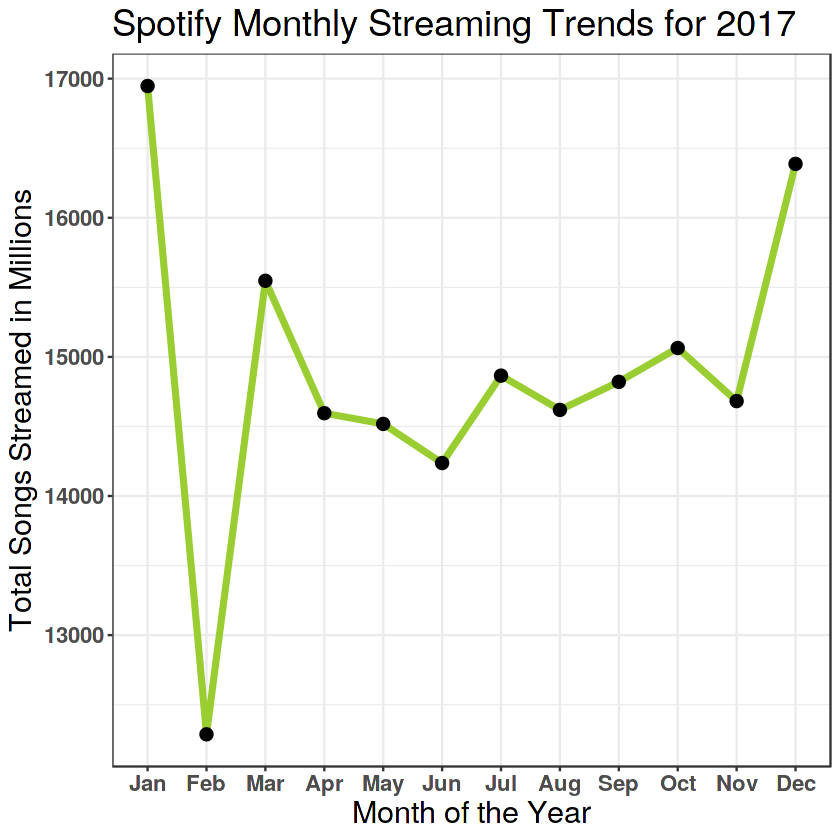

In [9]:
spotify_trends <- daily_spotify %>%
  select(month_name,month,Streams) %>%
  group_by(month_name,month) %>%
  summarise(Total_Streams = sum(Streams)) %>%
  mutate(millions = Total_Streams/1000000)


spotify_trends$month_name <- factor(spotify_trends$month_name, levels=spotify_trends$month_name[order((spotify_trends$month))])


g1 <- ggplot(data=spotify_trends,aes(x=month_name,y=millions,group=1)) +
  geom_line(stat = "identity",  color = "yellowgreen", size=1.5) + 
  geom_point(size=3) +
  theme_bw() + 
  xlab("Month of the Year") + ylab("Total Songs Streamed in Millions") +
    ggtitle("Spotify Monthly Streaming Trends for 2017")

g1 + theme(text = element_text(size = 18), axis.text.x = element_text(size = 13, face="bold"), axis.text.y = element_text(size = 13, face="bold")) 

In [10]:
names(daily_spotify)[names(daily_spotify) == "Date <- ymd(Date)"] <- "Date"

In [11]:
daily_spotify$weekday <- weekdays(daily_spotify$Date)   # Convert dates to weekdays

In [12]:
daily_spotify$day_number <- as.numeric(strftime(as.Date(daily_spotify$Date, "%d-%m-%Y"), "%u"))

### What day of the week experience more streams?

#### The streams appear to be pretty consistent throughout the week. Nevertheless, FRIDAY  and SATURDAY appear to experience a slightly increase of streams

`summarise()` regrouping output by 'weekday' (override with `.groups` argument)



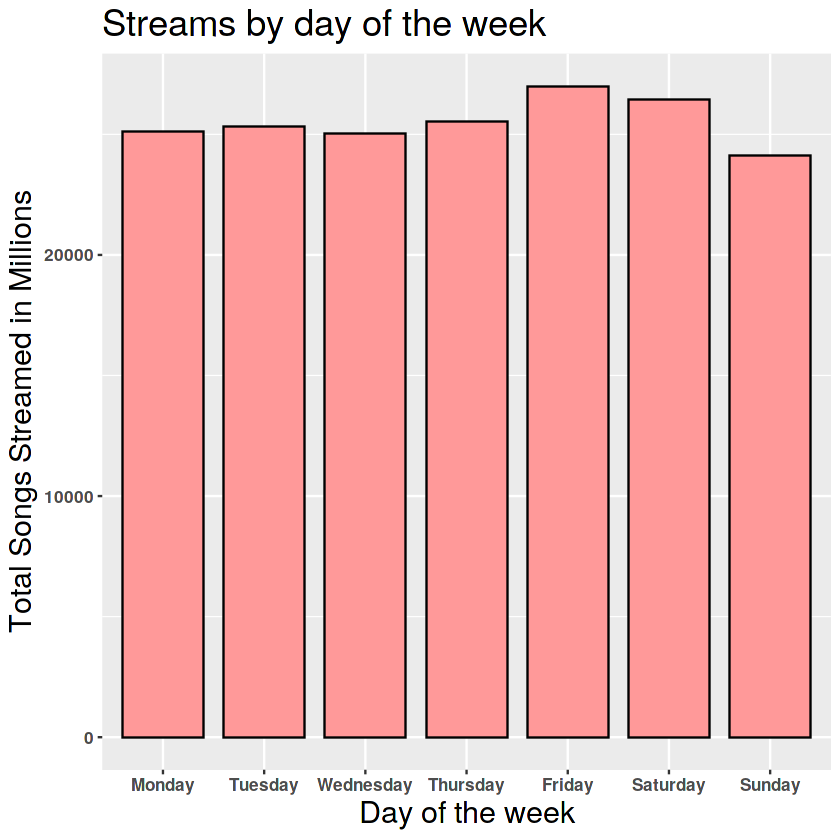

In [13]:
weekly_trends <- daily_spotify %>%
  select(weekday,day_number,Streams) %>%
  group_by(weekday, day_number) %>%
  summarise(Total_Streams = sum(Streams)) %>%
  mutate(millions = Total_Streams/1000000)

weekly_trends$weekday <- factor(weekly_trends$weekday, levels=weekly_trends$weekday[order((weekly_trends$day_number))])


g2 <- ggplot(data=weekly_trends,aes(x=weekday,y=millions,group=1)) +
  geom_bar(stat = "identity", fill="#FF9999", colour="black", width = 0.8 ) + 
  #geom_line(stat = "identity",  color = "yellowgreen") + 
  #geom_point() +
  #theme_bw() + 
  xlab("Day of the week") + ylab("Total Songs Streamed in Millions") +
    ggtitle("Streams by day of the week")

g2 + theme(text = element_text(size = 18), axis.text.x = element_text(size = 10, face="bold"), axis.text.y = element_text(size = 10, face="bold")) 

### Most streamed artists of 2017 on Spotify

#### In order to try to list the top artists, I'll use the "Streams" variable.

#### Ed Sheeran is leading the chart with way more streams compared to the other artists  

`summarise()` ungrouping output (override with `.groups` argument)



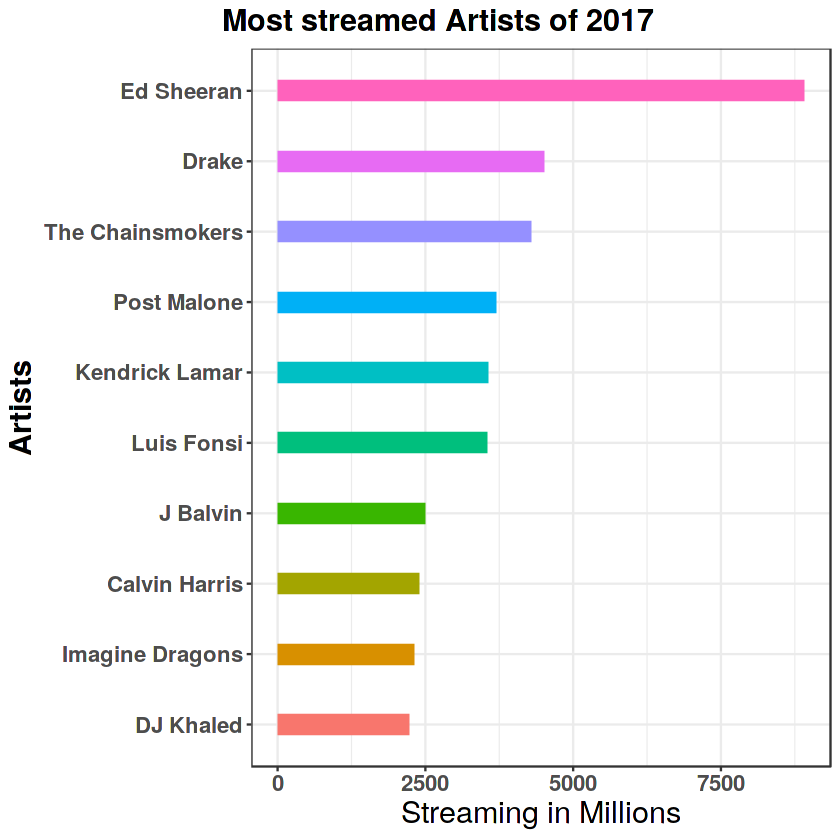

In [14]:
#Artists who have had the most streams throughout the year. Top 10
trend_top10 <- daily_spotify %>% 
  select(Artist,Streams) %>% 
  group_by(Artist)  %>% 
  summarise(Total_Streams = sum(Streams)) %>%
  mutate(millions = Total_Streams/1000000) %>%
  arrange(desc(millions),Artist) %>%
  head(10)

trend_top10$Artist <- factor(trend_top10$Artist, levels = trend_top10$Artist [order(trend_top10$millions)]) # in order to visualise the list in descending order

g3 <- ggplot(trend_top10, aes(x=Artist, y=millions, size=6, color=Artist)) +
    #geom_point(size=3) + 
    geom_segment(aes(x=Artist,xend=Artist, y=0, yend=millions)) +
    xlab("Artists") + ylab("Streaming in Millions") +
    ggtitle("Most streamed Artists of 2017") +
    #labs(title = "Top Artists of 2017", x='',y='Streaming in millions') +
    theme_bw() +
    theme(legend.position = 'none', plot.title = element_text(size=18, hjust = -0.2, face = "bold"), axis.title.y = element_text(face = "bold"), axis.title.x = element_text(angle = 0)) +    
    coord_flip()

g3 + theme(text = element_text(size = 18), axis.text.x = element_text(size = 13, face="bold"), axis.text.y = element_text(size = 13, face="bold")) 

### Most songs streamed in 2017

#### Despacito (Original and Remix) take the second and third place.

In [15]:
names(daily_spotify)[names(daily_spotify) == "Track Name"] <- "Track_Name"

`summarise()` ungrouping output (override with `.groups` argument)



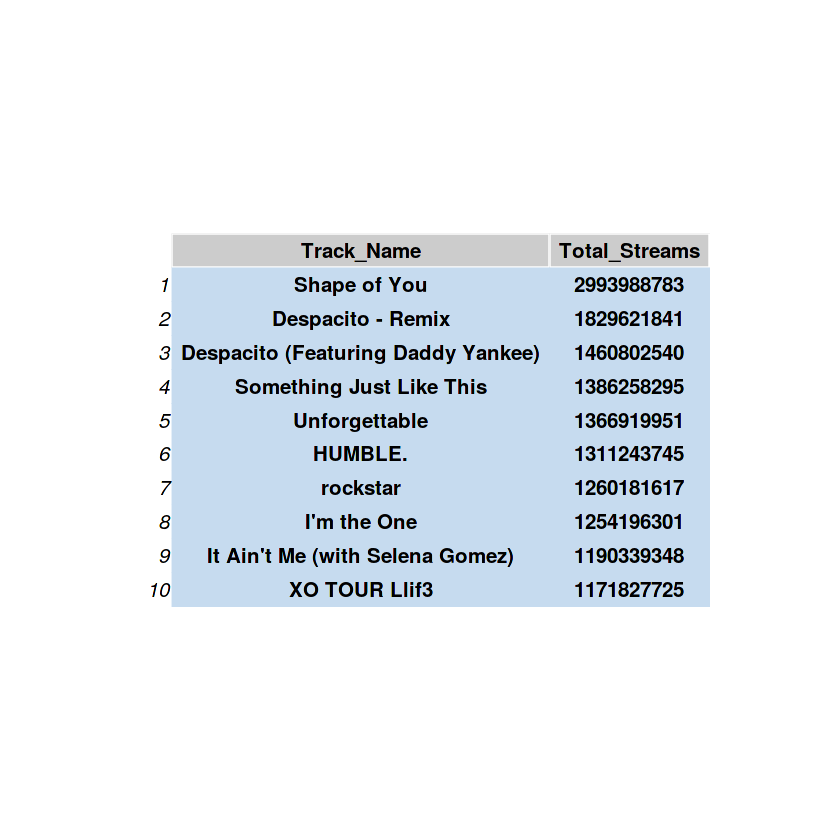

In [16]:
songs_top10 <- daily_spotify %>% 
  select(Track_Name,Streams) %>% 
  group_by(Track_Name)  %>% 
  summarise(Total_Streams = sum(Streams)) %>%
  arrange(desc(Total_Streams),Track_Name) %>%
  head(10)


thm <- ttheme_default(
    core=list(bg_params = list(fill = blues9[3:3], col=NA),
        fg_params=list(fontface=2)),
    colhead=list(fg_params=list(cex=1, col="black")))
    

table <- tableGrob(songs_top10,theme=thm)


grid.draw(table)

### US Most streamed artists of 2017

#### Drake comes in first place here, considering the "Streams" variable. Ed Sheeran falls back at the 5th place. Kendrick Lamar and Post Malone leap forward.

In [17]:
unique(daily_spotify$Region)

[1] "ec"     "fr"     "ar"     "fi"     "no"     "it"     "lt"     "ph"    
 [9] "tw"     "nz"     "ee"     "tr"     "us"     "sv"     "cr"     "de"    
[17] "cl"     "jp"     "br"     "hn"     "gt"     "ch"     "hu"     "ca"    
[25] "pe"     "be"     "my"     "dk"     "bo"     "pl"     "at"     "pt"    
[33] "se"     "mx"     "pa"     "uy"     "is"     "es"     "cz"     "ie"    
[41] "nl"     "sk"     "co"     "sg"     "id"     "do"     "lu"     "gb"    
[49] "global" "py"     "au"     "lv"     "gr"     "hk"

`summarise()` ungrouping output (override with `.groups` argument)



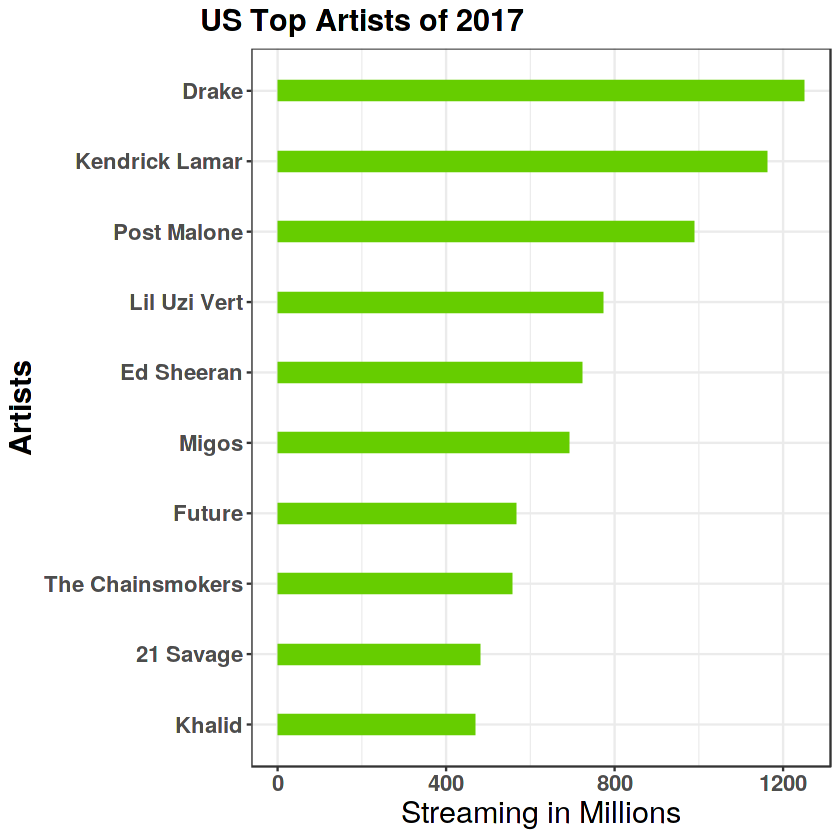

In [18]:
topArtists_us <- daily_spotify %>%
    filter(Region == "us") %>%
    group_by(Artist) %>%
    summarise(Total_Streams = sum(Streams)) %>%
    mutate(millions = Total_Streams/1000000) %>%
    arrange(desc(Total_Streams),Artist) %>%
    head(10)

topArtists_us$Artist <- factor(topArtists_us$Artist, levels = topArtists_us$Artist [order(topArtists_us$millions)]) # in order to visualise the list in descending order

g4 <- ggplot(topArtists_us, aes(x=Artist, y=millions, size = 1 )) +
    #geom_point(size=3) + 
    geom_segment(aes(x=Artist,xend=Artist, y=0, yend=millions), color="chartreuse3") +
    xlab("Artists") + ylab("Streaming in Millions") +
    ggtitle("US Top Artists of 2017") +
    #labs(title = "Top Artists of 2017", x='',y='Streaming in millions') +
    theme_bw() +
    theme(legend.position = 'none', plot.title = element_text(size=18,hjust = -0.2, face = "bold"), axis.title.y = element_text(face = "bold"), axis.title.x = element_text(angle = 0)) +
    coord_flip()

g4 + theme(text = element_text(size = 18), axis.text.x = element_text(size = 13, face="bold"), axis.text.y = element_text(size = 13, face="bold"))

In [ ]:
# next step:
# Ed Sheeran/ Drake daily performances in the US
# Text Mining with audio features dataset